In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device:/device:GPU:0


In [14]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [15]:
base_model.trainable = False

In [16]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units = 512, activation='relu')(x)
outputs = keras.layers.Dense(units = 8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14,981,448
Trainable params: 266,760
Non-trainable params: 14,714,688
_________________________________________

In [18]:
model.compile(loss='categorical_crossentropy', 
              #optimizer='adam', 
              metrics='accuracy')

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    validation_split=0.2
)


In [20]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "C:\\programowanie\\RYBY2\\train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    subset='training'
)

# load and iterate validation dataset
valid_it = datagen_train.flow_from_directory(
    "C:\\programowanie\\RYBY2\\train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    subset='validation'
)

Found 3025 images belonging to 8 classes.
Found 752 images belonging to 8 classes.


In [21]:
model.fit(train_it, steps_per_epoch=train_it.samples/train_it.batch_size, 
          validation_data=valid_it, validation_steps=valid_it.samples/valid_it.batch_size, epochs=10)

Epoch 1/10
189/189 [==============================] - 54s 282ms/step - loss: 2.2931 - accuracy: 0.5068 - val_loss: 1.0292 - val_accuracy: 0.6676
Epoch 2/10
189/189 [==============================] - 52s 278ms/step - loss: 0.9570 - accuracy: 0.6853 - val_loss: 0.7081 - val_accuracy: 0.7540
Epoch 3/10
189/189 [==============================] - 53s 278ms/step - loss: 0.7205 - accuracy: 0.7531 - val_loss: 0.6646 - val_accuracy: 0.7846
Epoch 4/10
189/189 [==============================] - 55s 290ms/step - loss: 0.5938 - accuracy: 0.8003 - val_loss: 0.6714 - val_accuracy: 0.7965
Epoch 5/10
189/189 [==============================] - 56s 295ms/step - loss: 0.5188 - accuracy: 0.8268 - val_loss: 0.6230 - val_accuracy: 0.8032
Epoch 6/10
189/189 [==============================] - 55s 291ms/step - loss: 0.4322 - accuracy: 0.8595 - val_loss: 0.5844 - val_accuracy: 0.8457
Epoch 7/10
189/189 [==============================] - 54s 287ms/step - loss: 0.4615 - accuracy: 0.8486 - val_loss: 0.5173 - val_ac

In [22]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics='accuracy')

In [23]:
model.fit(train_it, steps_per_epoch=train_it.samples/train_it.batch_size, validation_data=valid_it, validation_steps=valid_it.samples/valid_it.batch_size, epochs=10)

Epoch 1/10
189/189 [==============================] - 80s 415ms/step - loss: 0.2396 - accuracy: 0.9160 - val_loss: 0.5561 - val_accuracy: 0.8298
Epoch 2/10
189/189 [==============================] - 77s 407ms/step - loss: 0.1712 - accuracy: 0.9379 - val_loss: 0.3717 - val_accuracy: 0.9109
Epoch 3/10
189/189 [==============================] - 79s 417ms/step - loss: 0.1481 - accuracy: 0.9537 - val_loss: 0.3536 - val_accuracy: 0.9162
Epoch 4/10
189/189 [==============================] - 80s 421ms/step - loss: 0.1103 - accuracy: 0.9597 - val_loss: 0.5325 - val_accuracy: 0.9096
Epoch 5/10
189/189 [==============================] - 80s 424ms/step - loss: 0.0896 - accuracy: 0.9686 - val_loss: 0.3392 - val_accuracy: 0.9295
Epoch 6/10
189/189 [==============================] - 79s 416ms/step - loss: 0.0670 - accuracy: 0.9808 - val_loss: 0.4037 - val_accuracy: 0.9242
Epoch 7/10
189/189 [==============================] - 81s 429ms/step - loss: 0.0696 - accuracy: 0.9745 - val_loss: 0.5643 - val_ac

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

1/1 [==============================] - 0s 45ms/step


'ALB'

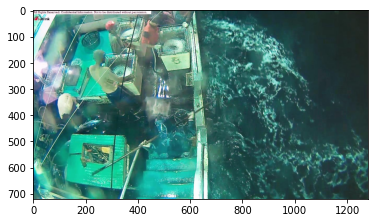

In [46]:
import numpy as np
#prediction = make_predictions('C:\\programowanie\\RYBY2\\train\\ALB\\img_00032.jpg')
prediction = make_predictions('C:\\programowanie\\RYBY2\\train\\ALB\\img_00019.jpg')
ryby = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
ryby[np.argmax(prediction)]

In [47]:
model.save('vgg16_fish_model_after_color_equalization_batch_16')

INFO:tensorflow:Assets written to: vgg16_fish_model_after_color_equalization_batch_16\assets


INFO:tensorflow:Assets written to: vgg16_fish_model_after_color_equalization_batch_16\assets
